<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%209/R/Week9_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Lab 9: Econometrics

In [1]:
install.packages('AER')
install.packages('plm')
install.packages('modelsummary')
install.packages("rdd")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘miscTools’, ‘bdsmatrix’, ‘collapse’, ‘maxLik’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘checkmate’, ‘insight’, ‘parameters’, ‘performance’, ‘tables’, ‘tinytable’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Sometimes panel data is also called longitudinal data as it adds a temporal dimension to cross-sectional data.


In [2]:
library(AER)
library(plm)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



pdata.frame() declares the data as panel data


In [3]:
data(Fatalities)
Fatalities<- pdata.frame(Fatalities, index = c("state", "year"))

Obtain the dimension and inspect the structure

In [4]:
is.data.frame(Fatalities)

[1] TRUE

In [5]:
dim(Fatalities)

[1] 336  34

In [6]:
str(Fatalities)

Classes ‘pdata.frame’ and 'data.frame':	336 obs. of  34 variables:
 $ state       : Factor w/ 48 levels "al","az","ar",..: 1 1 1 1 1 1 1 2 2 2 ...
  ..- attr(*, "names")= chr [1:336] "al-1982" "al-1983" "al-1984" "al-1985" ...
  ..- attr(*, "index")=Classes ‘pindex’ and 'data.frame':	336 obs. of  2 variables:
  .. ..$ state: Factor w/ 48 levels "al","az","ar",..: 1 1 1 1 1 1 1 2 2 2 ...
  .. ..$ year : Factor w/ 7 levels "1982","1983",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ year        : Factor w/ 7 levels "1982","1983",..: 1 2 3 4 5 6 7 1 2 3 ...
  ..- attr(*, "names")= chr [1:336] "al-1982" "al-1983" "al-1984" "al-1985" ...
  ..- attr(*, "index")=Classes ‘pindex’ and 'data.frame':	336 obs. of  2 variables:
  .. ..$ state: Factor w/ 48 levels "al","az","ar",..: 1 1 1 1 1 1 1 2 2 2 ...
  .. ..$ year : Factor w/ 7 levels "1982","1983",..: 1 2 3 4 5 6 7 1 2 3 ...
 $ spirits     : 'pseries' Named num  1.37 1.36 1.32 1.28 1.23 ...
  ..- attr(*, "names")= chr [1:336] "al-1982" "al-1983" "al-1984" "a

List the first few observations

In [7]:
head(Fatalities)

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,⋯,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
al-1982,al,1982,1.37,14.4,10544.15,50.69204,1.539379,30.3557,0.32829,19.00,⋯,32,309.438,3942002,208999.6,221553.4,290000.1,28516,9.7,57.8,-0.02212476
al-1983,al,1983,1.36,13.7,10732.80,52.14703,1.788991,30.3336,0.34341,19.00,⋯,35,341.834,3960008,202000.1,219125.5,290000.2,31032,9.6,57.9,0.04655825
al-1984,al,1984,1.32,11.1,11108.79,54.16809,1.714286,30.3115,0.35924,19.00,⋯,34,304.872,3988992,197000.0,216724.1,288000.2,32961,7.5,59.5,0.06279784
al-1985,al,1985,1.28,8.9,11332.63,55.27114,1.652542,30.2895,0.37579,19.67,⋯,45,276.742,4021008,194999.7,214349.0,284000.3,35091,7.2,60.1,0.02748997
al-1986,al,1986,1.23,9.8,11661.51,56.51450,1.609907,30.2674,0.39311,21.00,⋯,29,360.716,4049994,203999.9,212000.0,263000.3,36259,7.0,60.7,0.03214295
al-1987,al,1987,1.18,7.8,11944.00,57.50988,1.560000,30.2453,0.41123,21.00,⋯,30,368.421,4082999,204999.8,208998.5,258999.8,37426,6.2,61.5,0.04897637


Summarize the variables 'state' and 'year'

In [8]:
summary(Fatalities[, c(1, 2)])

     state       year   
 al     :  7   1982:48  
 az     :  7   1983:48  
 ar     :  7   1984:48  
 ca     :  7   1985:48  
 co     :  7   1986:48  
 ct     :  7   1987:48  
 (Other):294   1988:48  

Define the fatality rate

In [9]:
Fatalities$fatal_rate <- Fatalities$fatal / Fatalities$pop * 10000
summary(Fatalities$fatal_rate)

total sum of squares: 108.9155 
         id        time 
0.900980158 0.004539066 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8212  1.6237  1.9560  2.0404  2.4179  4.2178 

Subset the data

In [10]:
Fatalities1982 <- subset(Fatalities, year == "1982")
Fatalities1988 <- subset(Fatalities, year == "1988")

Estimate simple regression models using 1982 and 1988 data

In [11]:
fatal1982_mod <- lm(fatal_rate ~ beertax, data = Fatalities1982)
fatal1988_mod <- lm(fatal_rate ~ beertax, data = Fatalities1988)

In [12]:
coeftest(fatal1982_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01038    0.14957 13.4408   <2e-16 ***
beertax      0.14846    0.13261  1.1196   0.2687    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [13]:
coeftest(fatal1988_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  1.85907    0.11461 16.2205 < 2.2e-16 ***
beertax      0.43875    0.12786  3.4314  0.001279 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Plot the observations and add the estimated regression line for 1982 data

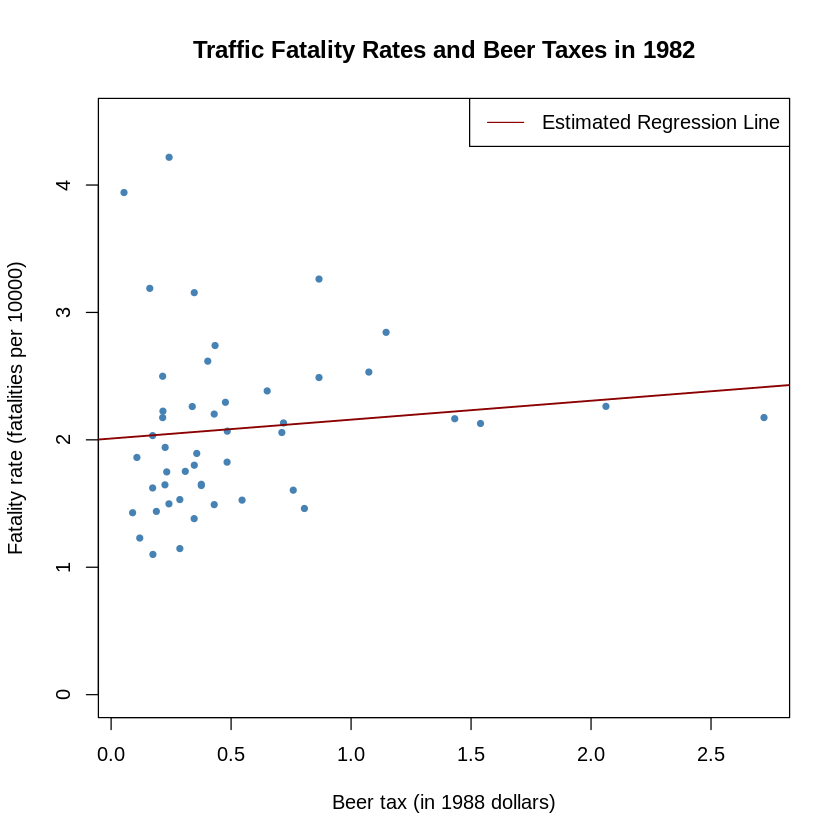

In [14]:
plot(x = as.double(Fatalities1982$beertax),
     y = as.double(Fatalities1982$fatal_rate),
     xlab = "Beer tax (in 1988 dollars)",
     ylab = "Fatality rate (fatalities per 10000)",
     main = "Traffic Fatality Rates and Beer Taxes in 1982",
     ylim = c(0, 4.5),
     pch = 20,
     col = "steelblue")

abline(fatal1982_mod, lwd = 1.5, col="darkred")
legend("topright",lty=1,col="darkred","Estimated Regression Line")

Plot observations and add estimated regression line for 1988 data

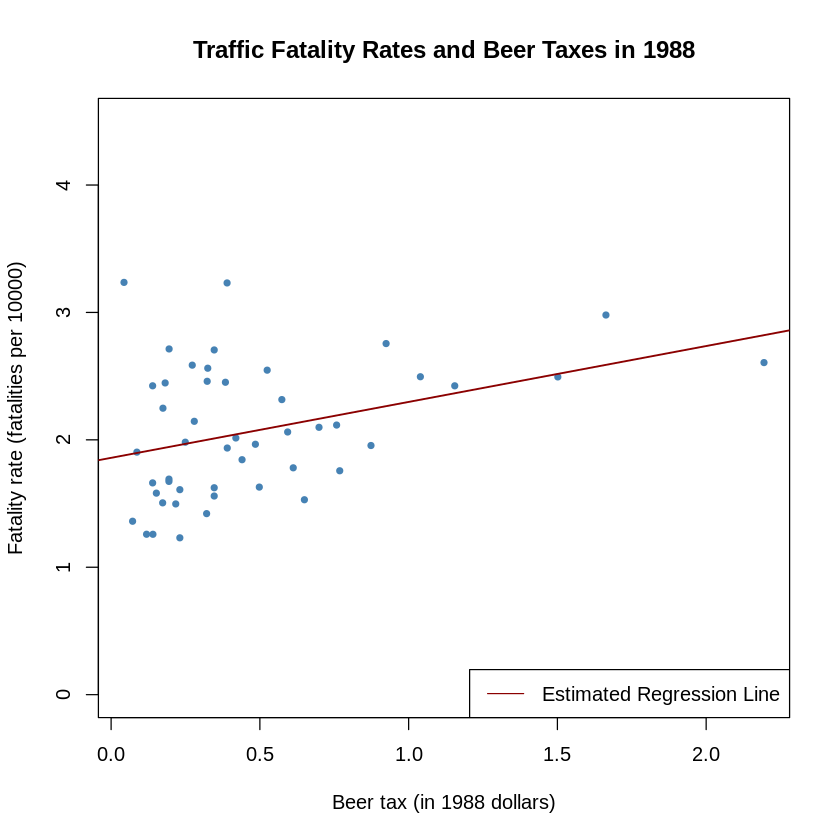

In [15]:
plot(x = as.double(Fatalities1988$beertax),
     y = as.double(Fatalities1988$fatal_rate),
     xlab = "Beer tax (in 1988 dollars)",
     ylab = "Fatality rate (fatalities per 10000)",
     main = "Traffic Fatality Rates and Beer Taxes in 1988",
     ylim = c(0, 4.5),
     pch = 20,
     col = "steelblue")

abline(fatal1988_mod, lwd = 1.5,col="darkred")
legend("bottomright",lty=1,col="darkred","Estimated Regression Line")

## Panel Data with Two Time Periods: “Before and After” Comparisons

Compute the differences

In [16]:
diff_fatal_rate <- Fatalities1988$fatal_rate - Fatalities1982$fatal_rate
diff_beertax <- Fatalities1988$beertax - Fatalities1982$beertax

Estimate a regression using differenced data

In [17]:
fatal_diff_mod <- lm(diff_fatal_rate ~ diff_beertax)

coeftest(fatal_diff_mod, vcov = vcovHC, type = "HC1")


t test of coefficients:

              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.072037   0.065355 -1.1022 0.276091   
diff_beertax -1.040973   0.355006 -2.9323 0.005229 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Plot the differenced data

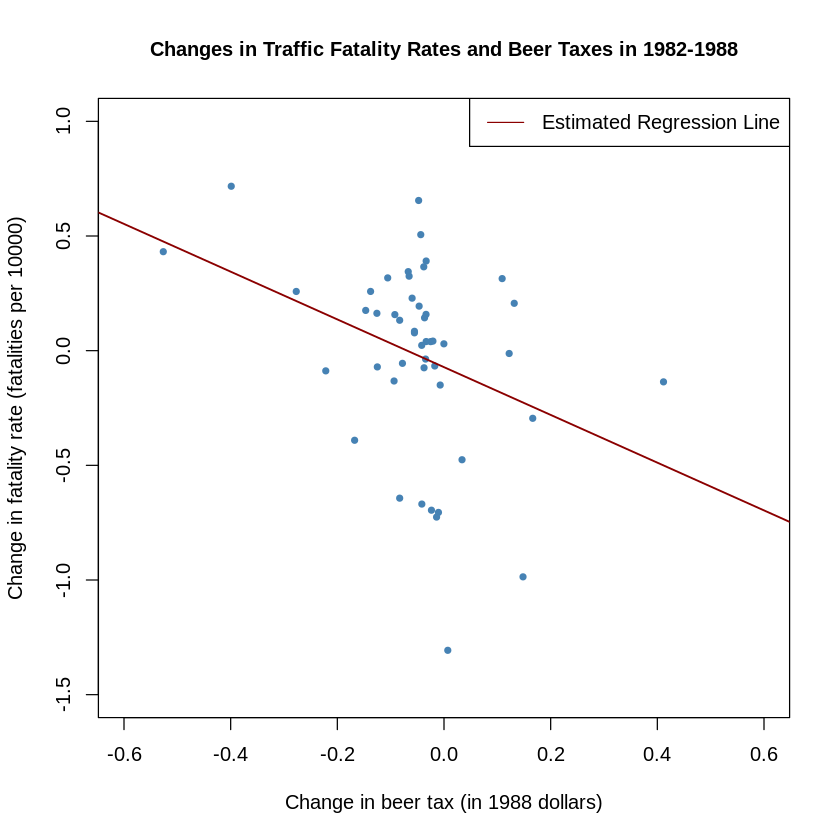

In [18]:
plot(x = as.double(diff_beertax),
     y = as.double(diff_fatal_rate),
     xlab = "Change in beer tax (in 1988 dollars)",
     ylab = "Change in fatality rate (fatalities per 10000)",
     main = "Changes in Traffic Fatality Rates and Beer Taxes in 1982-1988",
     cex.main=1,
     xlim = c(-0.6, 0.6),
     ylim = c(-1.5, 1),
     pch = 20,
     col = "steelblue")

# add the regression line to plot
abline(fatal_diff_mod, lwd = 1.5,col="darkred")
#add legend
legend("topright",lty=1,col="darkred","Estimated Regression Line")

Compute mean fatality rate over all states for all time periods

In [19]:
mean(Fatalities$fatal_rate)

[1] 2.040444

## Fixed Effects Regression

Software packages use a so-called “entity-demeaned” OLS algorithm which is computationally more efficient than estimating regression models with  k+nregressors as needed for models

Application to Traffic Deaths

In [20]:
class(Fatalities$state)

[1] "pseries" "factor"

In [21]:
fatal_fe_lm_mod <- lm(fatal_rate ~ beertax + state -1 , data = Fatalities)
fatal_fe_lm_mod


Call:
lm(formula = fatal_rate ~ beertax + state - 1, data = Fatalities)

Coefficients:
beertax  stateal  stateaz  statear  stateca  stateco  statect  statede  
-0.6559   3.4776   2.9099   2.8227   1.9682   1.9933   1.6154   2.1700  
statefl  statega  stateid  stateil  statein  stateia  stateks  stateky  
 3.2095   4.0022   2.8086   1.5160   2.0161   1.9337   2.2544   2.2601  
statela  stateme  statemd  statema  statemi  statemn  statems  statemo  
 2.6305   2.3697   1.7712   1.3679   1.9931   1.5804   3.4486   2.1814  
statemt  statene  statenv  statenh  statenj  statenm  stateny  statenc  
 3.1172   1.9555   2.8769   2.2232   1.3719   3.9040   1.2910   3.1872  
statend  stateoh  stateok  stateor  statepa  stateri  statesc  statesd  
 1.8542   1.8032   2.9326   2.3096   1.7102   1.2126   4.0348   2.4739  
statetn  statetx  stateut  statevt  stateva  statewa  statewv  statewi  
 2.6020   2.5602   2.3137   2.5116   2.1874   1.8181   2.5809   1.7184  
statewy  
 3.2491  


In [22]:
summary(fatal_fe_lm_mod)


Call:
lm(formula = fatal_rate ~ beertax + state - 1, data = Fatalities)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58696 -0.08284 -0.00127  0.07955  0.89780 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
beertax -0.65587    0.18785  -3.491 0.000556 ***
stateal  3.47763    0.31336  11.098  < 2e-16 ***
stateaz  2.90990    0.09254  31.445  < 2e-16 ***
statear  2.82268    0.13213  21.364  < 2e-16 ***
stateca  1.96816    0.07401  26.594  < 2e-16 ***
stateco  1.99335    0.08037  24.802  < 2e-16 ***
statect  1.61537    0.08391  19.251  < 2e-16 ***
statede  2.17003    0.07746  28.016  < 2e-16 ***
statefl  3.20950    0.22151  14.489  < 2e-16 ***
statega  4.00223    0.46403   8.625 4.43e-16 ***
stateid  2.80861    0.09877  28.437  < 2e-16 ***
stateil  1.51601    0.07848  19.318  < 2e-16 ***
statein  2.01609    0.08867  22.736  < 2e-16 ***
stateia  1.93370    0.10222  18.918  < 2e-16 ***
stateks  2.25441    0.10863  20.753  < 2e-16 ***
stateky  2.26011    0.08

Obtain demeaned data

In [23]:
fatal_demeaned <- with(Fatalities,
            data.frame(fatal_rate = fatal_rate - ave(fatal_rate, state),
            beertax = beertax - ave(beertax, state)))

Estimate the regression

In [24]:
summary(lm(fatal_rate ~ beertax - 1, data = fatal_demeaned))


Call:
lm(formula = fatal_rate ~ beertax - 1, data = fatal_demeaned)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58696 -0.08284 -0.00127  0.07955  0.89780 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
beertax  -0.6559     0.1739  -3.772 0.000191 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1757 on 335 degrees of freedom
Multiple R-squared:  0.04074,	Adjusted R-squared:  0.03788 
F-statistic: 14.23 on 1 and 335 DF,  p-value: 0.0001913


Estimate the fixed effects regression with `plm()`

In [25]:
fatal_fe_mod <- plm(fatal_rate ~ beertax,
                    data = Fatalities,
                    index = c("state", "year"),
                    model = "within")
coeftest(fatal_fe_mod, vcov. = vcovHC, type = "HC1")


t test of coefficients:

        Estimate Std. Error t value Pr(>|t|)  
beertax -0.65587    0.28880  -2.271  0.02388 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Regression with Time Fixed Effects

Estimate a combined time and entity fixed effects regression model

Via `lm()`

In [26]:
fatal_tefe_lm_mod <- lm(fatal_rate ~ beertax + state + year - 1, data = Fatalities)
summary(fatal_tefe_lm_mod)


Call:
lm(formula = fatal_rate ~ beertax + state + year - 1, data = Fatalities)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59556 -0.08096  0.00143  0.08234  0.83883 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
beertax  -0.63998    0.19738  -3.242  0.00133 ** 
stateal   3.51137    0.33250  10.560  < 2e-16 ***
stateaz   2.96451    0.09933  29.846  < 2e-16 ***
statear   2.87284    0.14162  20.286  < 2e-16 ***
stateca   2.02618    0.07857  25.787  < 2e-16 ***
stateco   2.04984    0.08594  23.851  < 2e-16 ***
statect   1.67125    0.08989  18.592  < 2e-16 ***
statede   2.22711    0.08264  26.951  < 2e-16 ***
statefl   3.25132    0.23590  13.782  < 2e-16 ***
statega   4.02300    0.49087   8.196 8.92e-15 ***
stateid   2.86242    0.10606  26.990  < 2e-16 ***
stateil   1.57287    0.08380  18.769  < 2e-16 ***
statein   2.07123    0.09512  21.775  < 2e-16 ***
stateia   1.98709    0.10976  18.103  < 2e-16 ***
stateks   2.30707    0.11663  19.781  < 2e-16 ***
s

Via `plm()`

In [27]:
fatal_tefe_mod <- plm(fatal_rate ~ beertax,
                      data = Fatalities,
                      index = c("state", "year"),
                      model = "within",
                      effect = "twoways")

coeftest(fatal_tefe_mod, vcov = vcovHC, type = "HC1")


t test of coefficients:

        Estimate Std. Error t value Pr(>|t|)  
beertax -0.63998    0.35015 -1.8277  0.06865 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


check class of the model object

In [28]:
class(fatal_tefe_lm_mod)

[1] "lm"

Obtain a summary based on heteroskedasticity-robust standard errors

(no adjustment for heteroskedasticity only)

In [29]:
coeftest(fatal_tefe_lm_mod, vcov = vcovHC, type = "HC1")[1, ]

Estimate Std. Error    t value   Pr(>|t|) 
-0.6399800  0.2547149 -2.5125346  0.0125470

Obtain a summary based on clustered standard errors

(adjustment for autocorrelation + heteroskedasticity)

In [30]:
coeftest(fatal_tefe_mod, vcov = vcovHC, type = "HC1")


t test of coefficients:

        Estimate Std. Error t value Pr(>|t|)  
beertax -0.63998    0.35015 -1.8277  0.06865 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Drunk Driving Laws and Traffic Deaths

discretize the minimum legal drinking age

In [31]:
Fatalities$drinkagec <- cut(Fatalities$drinkage,
                            breaks = 18:22,
                            include.lowest = TRUE,
                            right = FALSE)

Set minimum drinking age [21, 22] to be the baseline level

In [32]:
Fatalities$drinkagec <- relevel(Fatalities$drinkagec, "[21,22]")

Mandatory jail or community service?

In [33]:
Fatalities$punish <- with(Fatalities, factor(jail == "yes" | service == "yes",
                                             labels = c("no", "yes")))

The set of observations on all variables for 1982 and 1988

In [34]:
fatal_1982_1988 <- Fatalities[with(Fatalities, year == 1982 | year == 1988), ]

Estimate all seven models

In [35]:
fat_mod1 <- lm(fatal_rate ~ beertax, data = Fatalities)

In [36]:
fat_mod2 <- plm(fatal_rate ~ beertax + state, data = Fatalities)

In [37]:
fat_mod3 <- plm(fatal_rate ~ beertax + state + year,
                       index = c("state","year"),
                       model = "within",
                       effect = "twoways",
                       data = Fatalities)

In [38]:
fat_mod4 <- plm(fatal_rate ~ beertax + state + year + drinkagec
                       + punish + miles + unemp + log(income),
                       index = c("state", "year"),
                       model = "within",
                       effect = "twoways",
                       data = Fatalities)

In [39]:
fat_mod5 <- plm(fatal_rate ~ beertax + state + year + drinkagec
                       + punish + miles,
                       index = c("state", "year"),
                       model = "within",
                       effect = "twoways",
                       data = Fatalities)

In [40]:
fat_mod6 <- plm(fatal_rate ~ beertax + year + drinkage
                       + punish + miles + unemp + log(income),
                       index = c("state", "year"),
                       model = "within",
                       effect = "twoways",
                       data = Fatalities)

In [41]:
fat_mod7 <- plm(fatal_rate ~ beertax + state + year + drinkagec
                       + punish + miles + unemp + log(income),
                       index = c("state", "year"),
                       model = "within",
                       effect = "twoways",
                       data = fatal_1982_1988)

In [42]:
library(modelsummary)

In [43]:
# gather clustered standard errors in a list
rob_se <- list(sqrt(diag(vcovHC(fat_mod1, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod2, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod3, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod4, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod5, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod6, type = "HC1"))),
               sqrt(diag(vcovHC(fat_mod7, type = "HC1"))))

In [44]:
modelsummary(list(fat_mod1, fat_mod2, fat_mod3, fat_mod4, fat_mod5, fat_mod6, fat_mod7),
             fmt = 4,
             stars = c('*' = .1, '**' = .05, '***' = .01),
             gof_map = c("nobs", "r.squared"),
             se = rob_se,
             title = "Linear Panel Regression Models of Traffic Fatalities due to Drunk Driving")




+------------------+-----------+------------+------------+------------+------------+------------+------------+
|                  | (1)       | (2)        | (3)        | (4)        | (5)        | (6)        | (7)        |
+==================+===========+============+============+============+============+============+============+
| (Intercept)      | 1.8533*** |            |            |            |            |            |            |
+------------------+-----------+------------+------------+------------+------------+------------+------------+
|                  | (0.0436)  |            |            |            |            |            |            |
+------------------+-----------+------------+------------+------------+------------+------------+------------+
| beertax          | 0.3646*** | -0.6559*** | -0.6400*** | -0.4453*** | -0.6899*** | -0.4565*** | -0.9256*** |
+------------------+-----------+------------+------------+------------+------------+------------+------------+


## The Electoral Advantage to Incumbency and Voters' Valuation of Politicians' Experience: A Regression Discontinuity Analysis of Elections to the U.S

In [45]:
library(rdd)
library(car)

Loading required package: Formula



In [46]:
df_incum <- read.csv("https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%209/data/indiv_final.csv")
head(df_incum)


,yearel,myoutcomenext,difshare
,<int>,<int>,<dbl>
1,1946,0,0.0614882
2,1946,0,-0.0614882
3,1948,1,0.1048695
4,1948,0,-0.1048695
5,1948,0,-0.5357210
6,1950,0,0.1644641


yearel: election year

myoutcomenext: a dummy variable indicating whether the candidate of the incumbent party was elected

difshare: a normalized running variable: proportion of votes of the party in the previous election - 0.5. If  difshare>0 then the candidate runs for the same
party as the incumbent.

In [47]:
# Create a variable to indicate whether the party of the candidate is the same as the incumbent
df_incum$incum_paty <- as.numeric(df_incum$difshare > 0)

incum_proportion <- sum(df_incum$incum_paty)/nrow(df_incum)

summary(df_incum$incum_paty)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.399   1.000   1.000 

Analyzing, it can not be rejected that the null hypothesis difference is equals zero. According to the output the p-value associated to this test is 0.962. This implies that the assumption that there is no differential density around the cutoff holds in this case. It can also be seen in the plot produced by the R command and that is presented below:

Using calculated bin size:  0.005 
Using calculated bandwidth:  0.183 
Log difference in heights is  -0.002  with SE  0.052 
  this gives a z-stat of  -0.048 
  and a p value of  0.962 


cellmp,cellval
<dbl>,<dbl>
-1.0026228,0.01515854
-0.9973319,1.60680547
-0.9920410,0.21979886
-0.9867501,0.07579271
-0.9814592,0.03789636
-0.9761684,0.12884761
-0.9708775,0.12126834
-0.9655866,0.07579271
-0.9602957,0.11368907


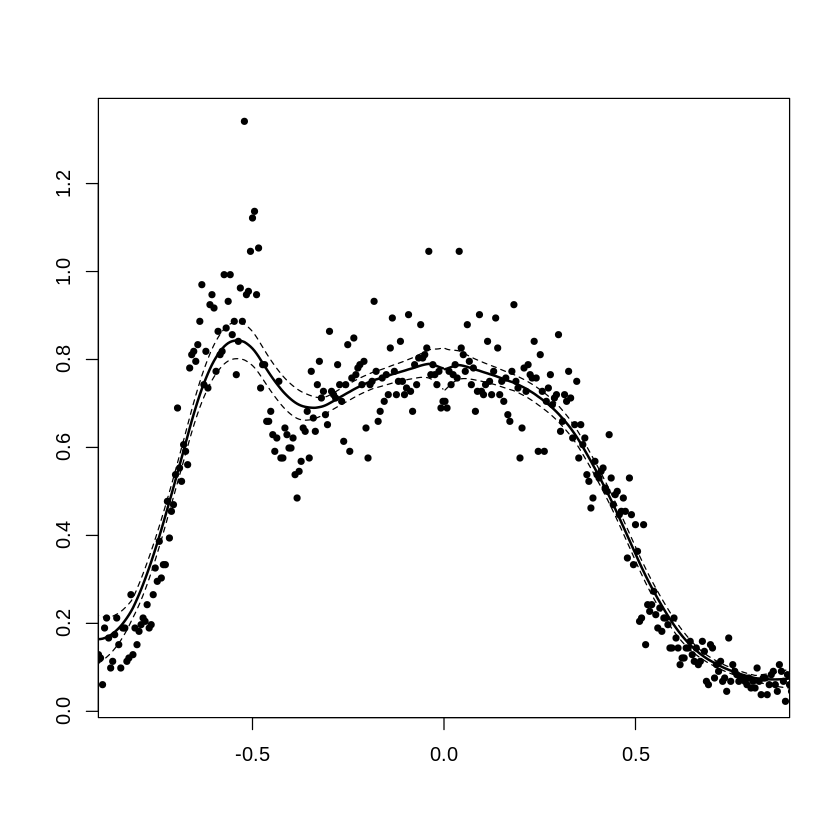

In [48]:
# Check for discontinuities
rdd::DCdensity(df_incum$difshare, 0, verbose = TRUE, htest = TRUE, ext.out=TRUE)


Parametric Regression

Now, doing a Parametric Regression keeping only the observations within 50 percentage points of the cutoff (the absolute value of difshare is less than or equal to 0.5)


In [49]:
# Add extra variables to run some linear models
df_incum$difshare_sq <- (df_incum$difshare)^2
df_incum$difshare_cub <- (df_incum$difshare)^3

In [50]:
# Model 1 - Y_i =𝛽_0 + 𝛽_1 Difshare_i ≥0 + e_i
m1 <- lm(myoutcomenext ~ incum_paty,
         data = df_incum,
         subset = abs(difshare) <= 0.5)
summary(m1)


Call:
lm(formula = myoutcomenext ~ incum_paty, data = df_incum, subset = abs(difshare) <= 
    0.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77463 -0.02151 -0.02151  0.22537  0.97849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.021509   0.003216   6.689 2.32e-11 ***
incum_paty  0.753124   0.004643 162.213  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3077 on 17601 degrees of freedom
Multiple R-squared:  0.5992,	Adjusted R-squared:  0.5992 
F-statistic: 2.631e+04 on 1 and 17601 DF,  p-value: < 2.2e-16


In [51]:
# Model 2 - Y_i =𝛽_0 + 𝛽_1 Difshare_i ≥0 + 𝛽_2 Difshare_i + e_i
m2 <- lm(myoutcomenext ~ incum_paty + difshare,
         data = df_incum,
         subset = abs(difshare) <= 0.5)
summary(m2)


Call:
lm(formula = myoutcomenext ~ incum_paty + difshare, data = df_incum, 
    subset = abs(difshare) <= 0.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84767 -0.05064  0.01555  0.20671  1.02522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.087180   0.005073   17.19   <2e-16 ***
incum_paty  0.626388   0.008896   70.41   <2e-16 ***
difshare    0.268232   0.016107   16.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3054 on 17600 degrees of freedom
Multiple R-squared:  0.6054,	Adjusted R-squared:  0.6054 
F-statistic: 1.35e+04 on 2 and 17600 DF,  p-value: < 2.2e-16


In [52]:
# Model 3 - Y_i =𝛽_0 + 𝛽_1 Difshare_i ≥0 + 𝛽_2 Difshare_i + 𝛽_3 Difshare_i ≥0 * Difshare_i + e_i
m3 <- lm(myoutcomenext ~ incum_paty + difshare + incum_paty*difshare,
         data = df_incum,
         subset = abs(difshare) <= 0.5)
summary(m3)


Call:
lm(formula = myoutcomenext ~ incum_paty + difshare + incum_paty * 
    difshare, data = df_incum, subset = abs(difshare) <= 0.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87965 -0.04019  0.00226  0.19854  1.00846 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.063624   0.006195  10.271  < 2e-16 ***
incum_paty          0.623200   0.008898  70.035  < 2e-16 ***
difshare            0.172020   0.021697   7.928 2.36e-15 ***
incum_paty:difshare 0.213689   0.032336   6.608 3.99e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.305 on 17599 degrees of freedom
Multiple R-squared:  0.6064,	Adjusted R-squared:  0.6063 
F-statistic:  9038 on 3 and 17599 DF,  p-value: < 2.2e-16


In [53]:
# Model 4 - Y_i =𝛽_0 + 𝛽_1 Difshare_i ≥0 + 𝛽_2 Difshare_i + 𝛽_2 Difshare_i2 + e_i
m4 <- lm(myoutcomenext ~ incum_paty + difshare + difshare_sq,
         data = df_incum,
         subset = abs(difshare) <= 0.5)
summary(m4)


Call:
lm(formula = myoutcomenext ~ incum_paty + difshare + difshare_sq, 
    data = df_incum, subset = abs(difshare) <= 0.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.88608 -0.03960  0.00443  0.20247  1.00887 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.074149   0.005489  13.508  < 2e-16 ***
incum_paty  0.622731   0.008906  69.920  < 2e-16 ***
difshare    0.280344   0.016209  17.295  < 2e-16 ***
difshare_sq 0.196243   0.031780   6.175 6.76e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.305 on 17599 degrees of freedom
Multiple R-squared:  0.6063,	Adjusted R-squared:  0.6062 
F-statistic:  9033 on 3 and 17599 DF,  p-value: < 2.2e-16


In [54]:
# Model 5 - Y_i =𝛽_0 + 𝛽_1 Difshare_i ≥0 + 𝛽_2 Difshare_i + 𝛽_2 Difshare_i3 + e_i
m5 <- lm(myoutcomenext ~ incum_paty + difshare + difshare_cub,
         data = df_incum,
         subset = abs(difshare) <= 0.5)
summary(m5)


Call:
lm(formula = myoutcomenext ~ incum_paty + difshare + difshare_cub, 
    data = df_incum, subset = abs(difshare) <= 0.5)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.82166 -0.04414  0.01666  0.19207  1.02139 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.121048   0.006277  19.283   <2e-16 ***
incum_paty    0.556116   0.011754  47.312   <2e-16 ***
difshare      0.591896   0.038962  15.192   <2e-16 ***
difshare_cub -1.471441   0.161363  -9.119   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3046 on 17599 degrees of freedom
Multiple R-squared:  0.6073,	Adjusted R-squared:  0.6072 
F-statistic:  9071 on 3 and 17599 DF,  p-value: < 2.2e-16


Now, using the RDestimate command in R to estimate the effect non-parametrically and see what 0.4707 is the point estimated obtained using this command.

In [55]:
model <- rdd::RDestimate(myoutcomenext~difshare, data=df_incum, subset = abs(df_incum$difshare) <=0.5)
summary(model)


Call:
rdd::RDestimate(formula = myoutcomenext ~ difshare, data = df_incum, 
    subset = abs(df_incum$difshare) <= 0.5)

Type:
sharp 

Estimates:
           Bandwidth  Observations  Estimate  Std. Error  z value  Pr(>|z|)  
LATE       0.11982    4695          0.4707    0.02695     17.47     2.578e-68
Half-BW    0.05991    2363          0.4511    0.03934     11.47     1.974e-30
Double-BW  0.23965    9182          0.5119    0.01818     28.15    2.082e-174
              
LATE       ***
Half-BW    ***
Double-BW  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

F-statistics:
           F       Num. DoF  Denom. DoF  p
LATE        878.0  3         4691        0
Half-BW     334.1  3         2359        0
Double-BW  2493.8  3         9178        0


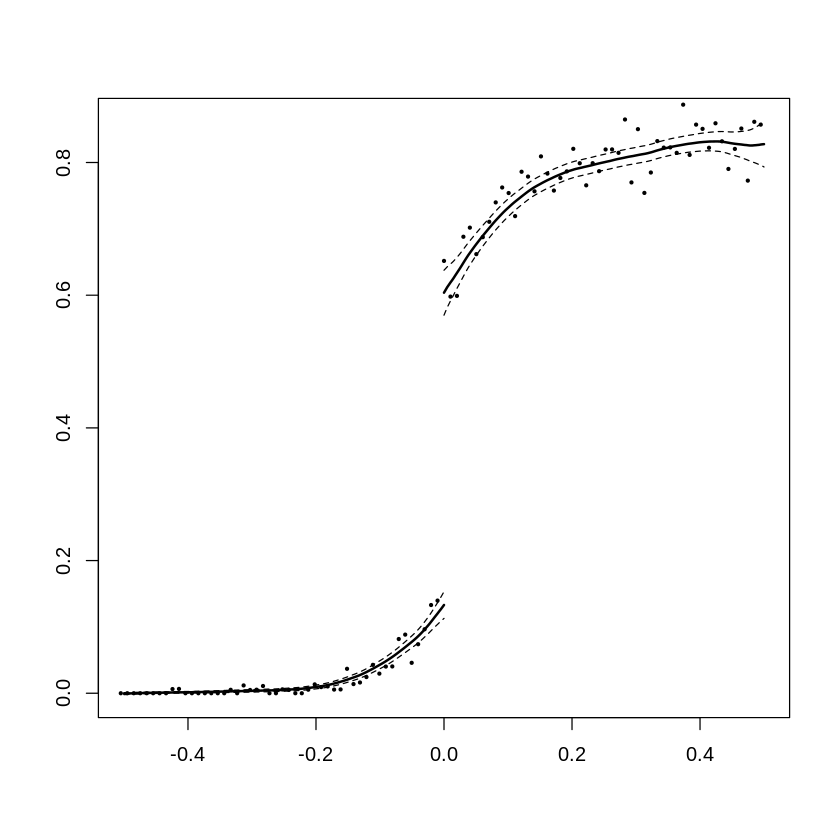

In [56]:
#Plot A
model1 <- rdd::RDestimate(myoutcomenext ~ difshare,
                     data = df_incum,
                     subset = abs(df_incum$difshare) <=0.5)
plot(model1)

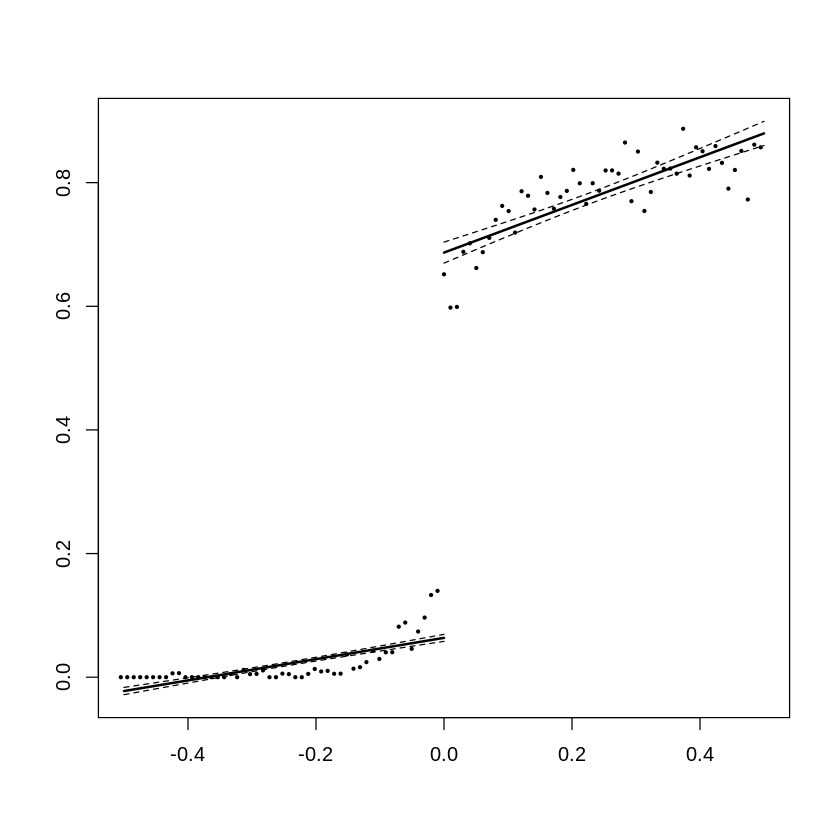

In [57]:
#Plot B
model2 <- rdd::RDestimate(myoutcomenext ~ difshare,
                     data = df_incum,
                     subset=abs(df_incum$difshare) <=0.5,
                     kernel = "rectangular", bw = 3)
plot(model2)

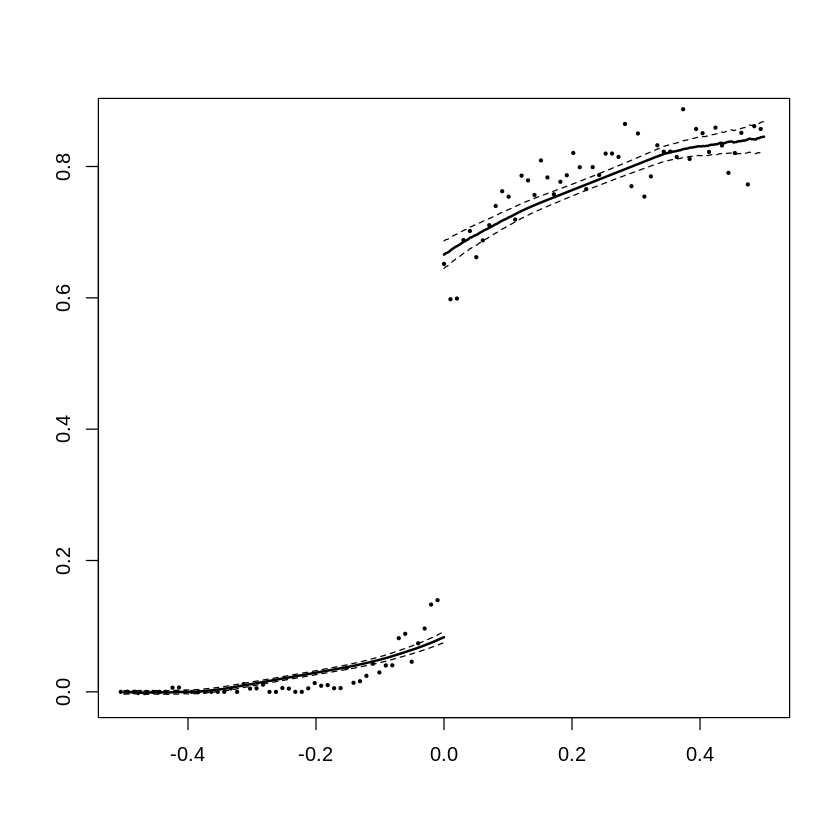

In [58]:
#Plot C
model3 <- rdd::RDestimate(myoutcomenext ~ difshare,
                     data = df_incum,
                     subset=abs(df_incum$difshare) <=0.5,
                     kernel = "rectangular", bw = (1/3))
plot(model3)